<a href="https://colab.research.google.com/github/abhinavsoma1213/MNIST-Classification/blob/main/MNIST_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the Libraries such as numpy, keras, seaborn, etc.

In [26]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(0)


# Data and importing the MNIST dataset from Keras

In [27]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
 


In [28]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


# Visualize the Examples

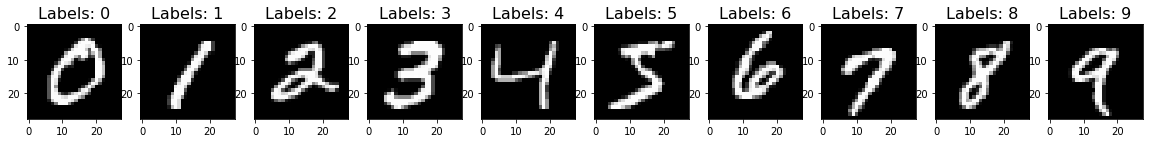

In [29]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Labels: {}".format(i), fontsize=16)

In [30]:
for i in range(10):
  print(y_train[i])

5
0
4
1
9
2
1
3
1
4


In [31]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [32]:
for i in range(10):
  print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


# Prepare Data

# Step 1) Normalize the Data

In [33]:
x_train = x_train / 255.0
x_test = x_test / 255.0

# Step 2) Reshape the Data

In [34]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)

(60000, 784)


# Create Model: The fully connected Neural Network

In [35]:
model = Sequential()

model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


# Train the model

In [36]:
batch_size = 512
epochs = 20
model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)


Epoch 1/20
118/118 [==============================] - 2s 13ms/step - loss: 0.5862 - accuracy: 0.8324
Epoch 2/20
118/118 [==============================] - 2s 13ms/step - loss: 0.2235 - accuracy: 0.9350
Epoch 3/20
118/118 [==============================] - 2s 13ms/step - loss: 0.1624 - accuracy: 0.9522
Epoch 4/20
118/118 [==============================] - 1s 13ms/step - loss: 0.1261 - accuracy: 0.9626
Epoch 5/20
118/118 [==============================] - 1s 12ms/step - loss: 0.1049 - accuracy: 0.9692
Epoch 6/20
118/118 [==============================] - 1s 12ms/step - loss: 0.0875 - accuracy: 0.9740
Epoch 7/20
118/118 [==============================] - 1s 12ms/step - loss: 0.0744 - accuracy: 0.9774
Epoch 8/20
118/118 [==============================] - 1s 13ms/step - loss: 0.0653 - accuracy: 0.9794
Epoch 9/20
118/118 [==============================] - 1s 13ms/step - loss: 0.0557 - accuracy: 0.9828
Epoch 10/20
118/118 [==============================] - 1s 12ms/step - loss: 0.0496 - accura

# Evaluate

In [37]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

313/313 [==============================] - 2s 6ms/step - loss: 0.0746 - accuracy: 0.9789
Test Loss: 0.07462237775325775, Test Accuracy: 0.9789000153541565


In [38]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)

313/313 [==============================] - 1s 2ms/step
[[3.4166223e-09 4.4598167e-08 8.1384843e-07 ... 9.9999839e-01
  5.3080336e-09 4.2015679e-07]
 [3.2625784e-09 1.3576602e-06 9.9999863e-01 ... 3.4859659e-12
  3.5153429e-09 1.3330046e-16]
 [1.0625766e-06 9.9967611e-01 6.6355933e-05 ... 1.7256502e-04
  6.7376212e-05 2.8894613e-07]
 ...
 [6.5840616e-13 8.0797515e-11 5.4586577e-14 ... 1.2597173e-09
  1.5707254e-08 2.6685746e-07]
 [5.8656180e-10 2.2690889e-09 2.5529266e-14 ... 3.0813465e-09
  2.1574033e-05 4.5249169e-11]
 [2.7625138e-09 9.4292880e-14 2.5445706e-11 ... 1.4416755e-16
  8.4855300e-12 1.0379129e-12]]
[7 2 1 ... 4 5 6]


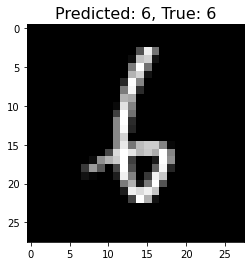

In [39]:
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]


plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28,28), cmap='gray')

# Confusion Matrix

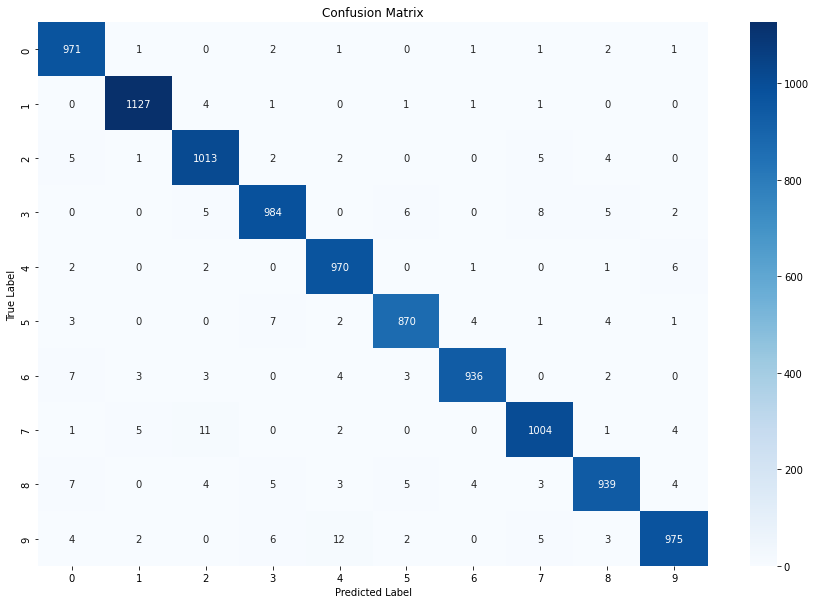

In [40]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

#Plotting
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix');

# Investigate the errors

In [41]:
errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]


In [42]:
y_pred_errors_probability = np.max(y_pred_errors, axis=1)
true_probability_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))
diff_errors_pred_true = y_pred_errors_probability - true_probability_errors

# Get list of indices of sorted differences

sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
top_idx_diff_errors = sorted_idx_diff_errors[-5:]

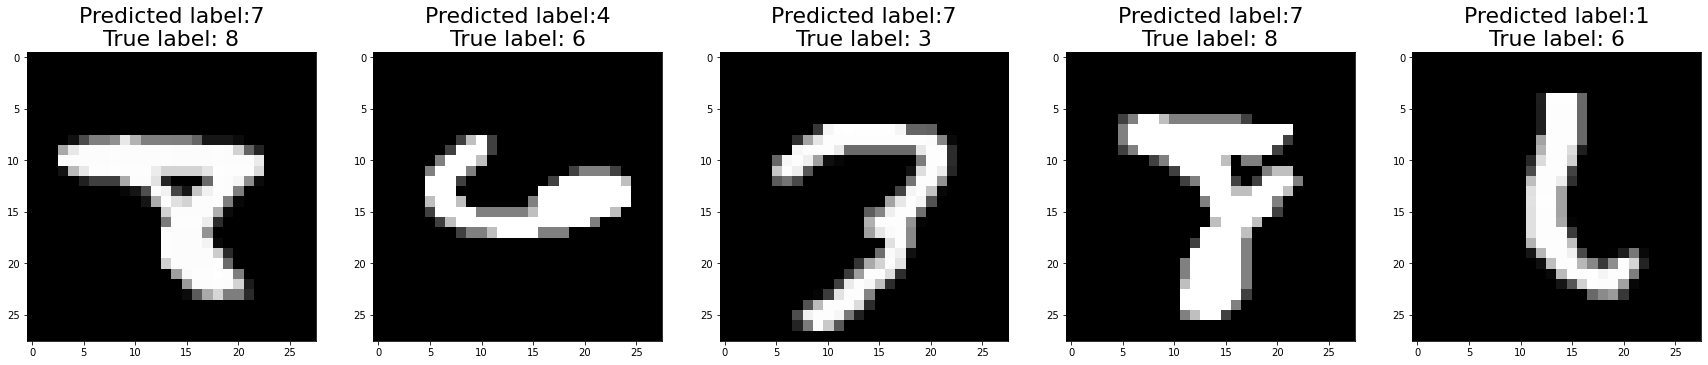

In [44]:
num = len(top_idx_diff_errors)
f, ax = plt.subplots(1, num, figsize=(30,30))

for i in range(0, num):
  idx = top_idx_diff_errors[i]
  sample = x_test_errors[idx].reshape(28,28)
  y_t = y_true_errors[idx]
  y_p = y_pred_classes_errors[idx]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Predicted label:{}\nTrue label: {}".format(y_p, y_t), fontsize=22)
